<a href="https://colab.research.google.com/github/VICTORNTA/Incomplete_project/blob/main/car_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import PIL.Image as pl
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mping
import scipy.io as sc

In [ ]:
cars_test = sc.loadmat(r"/content/drive/MyDrive/devkit/devkit/cars_test_annos.mat")
cars_train = sc.loadmat(r"/content/drive/MyDrive/devkit/devkit/cars_train_annos.mat")
cars_meta_data = sc.loadmat(r"/content/drive/MyDrive/devkit/devkit/cars_meta.mat")

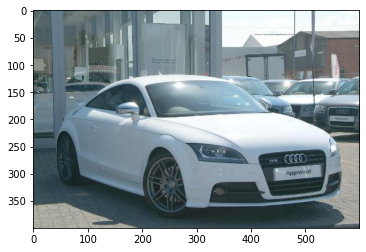

In [ ]:
a = mping.imread(r"/content/drive/MyDrive/kaggle/cars_train/cars_train/00001.jpg")
plt.imshow(a)

In [ ]:
cars_train.get('annotations').dtype

dtype([('bbox_x1', 'O'), ('bbox_y1', 'O'), ('bbox_x2', 'O'), ('bbox_y2', 'O'), ('class', 'O'), ('fname', 'O')])

In [ ]:
cars_train.get('annotations')

array([[(array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
        (array([[36]], dtype=uint8), array([[116]], dtype=uint8), array([[868]], dtype=uint16), array([[587]], dtype=uint16), array([[3]], dtype=uint8), array(['00002.jpg'], dtype='<U9')),
        (array([[85]], dtype=uint8), array([[109]], dtype=uint8), array([[601]], dtype=uint16), array([[381]], dtype=uint16), array([[91]], dtype=uint8), array(['00003.jpg'], dtype='<U9')),
        ...,
        (array([[26]], dtype=uint8), array([[246]], dtype=uint8), array([[660]], dtype=uint16), array([[449]], dtype=uint16), array([[163]], dtype=uint8), array(['08142.jpg'], dtype='<U9')),
        (array([[78]], dtype=uint8), array([[526]], dtype=uint16), array([[1489]], dtype=uint16), array([[908]], dtype=uint16), array([[112]], dtype=uint8), array(['08143.jpg'], dtype='<U9')),
        (array([[20]], dtype=uint8

In [ ]:
np.shape(cars_train.get("annotations"))

(1, 8144)

In [ ]:
car_train_images_name = []
for i in  range(0,8144):  
  car_train_images_name.append(cars_train.get('annotations')[0][i][5][0])

In [ ]:
#The Training Images name in jpg format according to the way it was arranged in the car_train folder
car_train_images_name

In [ ]:
car_train_class_names = []
for i in  range(0,8144):  
  car_train_class_names.append(cars_train.get('annotations')[0][i][4][0][0])

In [ ]:
bbox_x1 = []
bbox_y1 = []
bbox_x2 = []
bbox_y2 = []
for i in  range(0,8144):  
  bbox_x1.append(cars_train.get('annotations')[0][i][0][0][0])

for i in  range(0,8144):  
  bbox_y1.append(cars_train.get('annotations')[0][i][1][0][0])

for i in  range(0,8144):  
  bbox_x2.append(cars_train.get('annotations')[0][i][2][0][0])

for i in  range(0,8144):  
  bbox_y2.append(cars_train.get('annotations')[0][i][3][0][0])

In [ ]:
cars_test.get("annotations").dtype

dtype([('bbox_x1', 'O'), ('bbox_y1', 'O'), ('bbox_x2', 'O'), ('bbox_y2', 'O'), ('fname', 'O')])

In [ ]:
car_test_images_name = []
for i in  range(0,8041):  
  car_test_images_name.append(cars_test.get('annotations')[0][i][4][0])

In [ ]:
test_bbox_x1 = []
test_bbox_y1 = []
test_bbox_x2 = []
test_bbox_y2 = []
for i in  range(0,8041):  
  test_bbox_x1.append(cars_test.get('annotations')[0][i][0][0][0])

for i in  range(0,8041):  
  test_bbox_y1.append(cars_test.get('annotations')[0][i][1][0][0])

for i in  range(0,8041):  
  test_bbox_x2.append(cars_test.get('annotations')[0][i][2][0][0])

for i in  range(0,8041):  
  test_bbox_y2.append(cars_test.get('annotations')[0][i][3][0][0])

In [ ]:
x1 = np.array(bbox_x1)
y1 = np.array(bbox_y1)
x2 = np.array(bbox_x2)
y2 = np.array(bbox_y2)
class_names = np.array(car_train_class_names)
image_name = np.array(car_train_images_name)

In [ ]:
train_data = [x1,y1,x2,y2,class_names,image_name]
column_names = ["x1","y1","x2","y2","class_names","image_name"]

In [ ]:
df = pd.DataFrame(columns=column_names)

In [ ]:
df

,x1,y1,x2,y2,class_names,image_name


In [ ]:
df["x1"] = train_data[0]
df["y1"] = train_data[1]
df["x2"] = train_data[2]
df["y2"] = train_data[3]
df["class_names"] = train_data[4]
df["image_name"] = train_data[5]


In [ ]:
df

,x1,y1,x2,y2,class_names,image_name
0,39,116,569,375,14,00001.jpg
1,36,116,868,587,3,00002.jpg
2,85,109,601,381,91,00003.jpg
3,621,393,1484,1096,134,00004.jpg
4,14,36,133,99,106,00005.jpg
...,...,...,...,...,...,...
8139,3,44,423,336,78,08140.jpg
8140,138,150,706,523,196,08141.jpg
8141,26,246,660,449,163,08142.jpg
8142,78,526,1489,908,112,08143.jpg


In [ ]:
train_df = df[column_names]

In [ ]:
x1 = np.array(test_bbox_x1)
y1 = np.array(test_bbox_y1)
x2 = np.array(test_bbox_x2)
y2 = np.array(test_bbox_y2)
test_image_name = np.array(car_test_images_name)

In [ ]:
test_column_names = ["x1","y1","x2","y2","image_name"]

In [ ]:
test_df = pd.DataFrame(columns=test_column_names)

In [ ]:
test_data = [x1,y1,x2,y2,test_image_name]

In [ ]:
test_df["x1"] = test_data[0]
test_df["y1"] = test_data[1]
test_df["x2"] = test_data[2]
test_df["y2"] = test_data[3]
test_df["image_name"] = test_data[4]

In [ ]:
test_df

,x1,y1,x2,y2,image_name
0,30,52,246,147,00001.jpg
1,100,19,576,203,00002.jpg
2,51,105,968,659,00003.jpg
3,67,84,581,407,00004.jpg
4,140,151,593,339,00005.jpg
...,...,...,...,...,...
8036,49,57,1169,669,08037.jpg
8037,23,18,640,459,08038.jpg
8038,33,27,602,252,08039.jpg
8039,33,142,521,376,08040.jpg


### **IMAGE MANIPULATION**

In [ ]:
from PIL import Image as im

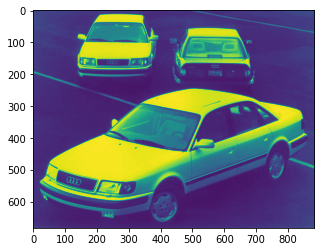

In [ ]:
plt.imshow(plt.imread(r"/content/drive/MyDrive/kaggle/cars_train/cars_train/08144.jpg"))

In [ ]:
train_df.head()

,x1,y1,x2,y2,class_names,image_name
0,39,116,569,375,14,00001.jpg
1,36,116,868,587,3,00002.jpg
2,85,109,601,381,91,00003.jpg
3,621,393,1484,1096,134,00004.jpg
4,14,36,133,99,106,00005.jpg


In [ ]:
os.chdir(r"/content/drive/MyDrive/kaggle/cars_train/cars_train/")

In [ ]:
train_df

,x1,y1,x2,y2,class_names,image_name
0,39,116,569,375,14,00001.jpg
1,36,116,868,587,3,00002.jpg
2,85,109,601,381,91,00003.jpg
3,621,393,1484,1096,134,00004.jpg
4,14,36,133,99,106,00005.jpg
...,...,...,...,...,...,...
8139,3,44,423,336,78,08140.jpg
8140,138,150,706,523,196,08141.jpg
8141,26,246,660,449,163,08142.jpg
8142,78,526,1489,908,112,08143.jpg


In [ ]:
!pwd

/content/drive/MyDrive/kaggle/cars_train/cars_train


In [ ]:
files = os.listdir()
files = sorted(files)


TRYING MULTIPROCESSING ON THE IMAGES.

In [ ]:
from matplotlib import image
import concurrent.futures as cf
import time

In [ ]:
images_path_list1 = []
images_path_list2 = []
images_path_list3 = []
images_path_list4 = []


In [ ]:
path = os. getcwd() 
path

'/content/drive/MyDrive/kaggle/cars_train/cars_train'

In [ ]:
2036+2036+2036

6108

In [ ]:
for i in range(0,2036):
  image_path = os.path.join(path,files[i])
  images_path_list1.append(image_path)

In [ ]:
for i in range(2036,4072):
  image_path = os.path.join(path,files[i])
  images_path_list2.append(image_path)

In [ ]:
for i in range(4072,6108):
  image_path = os.path.join(path,files[i])
  images_path_list3.append(image_path)

In [ ]:
for i in range(6108,8144):
  image_path = os.path.join(path,files[i])
  images_path_list4.append(image_path)

In [ ]:
print(f"list 1 - {images_path_list1[-1]} \n list 2 - {images_path_list2[-1]} \n list 3-{images_path_list3[-1]}\n list 4-{images_path_list4[-1]}")

list 1 - /content/drive/MyDrive/kaggle/cars_train/cars_train/02036.jpg 
 list 2 - /content/drive/MyDrive/kaggle/cars_train/cars_train/04072.jpg 
 list 3-/content/drive/MyDrive/kaggle/cars_train/cars_train/06108.jpg
 list 4-/content/drive/MyDrive/kaggle/cars_train/cars_train/08144.jpg


**Cropping and Resizing the Images**

In [ ]:
image_width = 150
image_height = 150

In [ ]:
# Return cropped image in form of numpy array
def crop_resize_image(coor,img_path,crop_img_path):
  '''coor must be a list containing x1,y1,x2,y2 coordinates'''
  image_to_crop = im.open(img_path)
  cropped_image = image_to_crop.crop(coor)
  resized_image = cropped_image.resize((image_width,image_height))
  resized_image.save(crop_img_path)

In [ ]:
# first_car = r"/content/drive/MyDrive/kaggle/cars_train/cars_train/00002.jpg"

In [ ]:
# import shutil
# shutil.rmtree(r"/content/drive/MyDrive/kaggle/cars_train/cropped_resized_image")

In [ ]:
# os.mkdir(r"/content/drive/MyDrive/kaggle/cars_train/cropped_resized_image")
# os.chdir(r"/content/drive/MyDrive/kaggle/cars_train/cropped_resized_image")
# crop_path = os.getcwd()
# crop_image_path_list = []
# for i in range(0,8144):
#   crop_image_path_list.append(os.path.join(crop_path,image_name[i]))

In [ ]:
coor_nested_list = [] 
for i in range(0,8144):
  coor_list = [bbox_x1[i],bbox_y1[i],bbox_x2[i],bbox_y2[i]]
  coor_nested_list.append(coor_list)

In [ ]:
# coor_nested_list[0]

In [ ]:
all_image_path = []
all_image_path = images_path_list1  + images_path_list2 + images_path_list3 + images_path_list4  

In [ ]:
import concurrent.futures as cf

In [ ]:
start = time.perf_counter()
with cf.ThreadPoolExecutor() as executor:
  results = executor.map(crop_resize_image,coor_nested_list,all_image_path,crop_image_path_list) 
finish = time.perf_counter()
print(f"The whole process took {finish-start} second(s)")

In [ ]:
import os
os.chdir(r"/content/drive/MyDrive/kaggle/cars_train/cropped_resized_image")
resized = os.listdir()
len(resized)

8144

In [ ]:
# resized_cars = []
# for i in resized:
  # resized_cars.append(im.open(i))

**IMAGE PREPROCESSING**

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
# train_df["images"] = resized_cars 

In [ ]:
train_df.head(5)

In [ ]:
class_list = sorted(list(train_df["class_names"].unique()))

In [ ]:
import shutil
shutil.rmtree(r"/content/drive/MyDrive/kaggle/cars_train/classes")

In [ ]:
classes_path = r"/content/drive/MyDrive/kaggle/cars_train/classes"
os.mkdir(classes_path)
for _ in class_list:
  os.mkdir(os.path.join(classes_path,f"class_{_}"))

In [ ]:
import shutil
def classify_image(class_folder_path,image_in_the_class):
  shutil.copy(image_in_the_class,class_folder_path)


In [ ]:
# shutil.rmtree(r"/content/drive/MyDrive/kaggle/cars_train/classes")
# os.mkdir(r"/content/drive/MyDrive/kaggle/cars_train/classes")

In [ ]:
# class1 = list(dict(train_df[train_df["class_names"] == 1]["image_name"]).keys())
# class1

In [ ]:
os.chdir(r"/content/drive/MyDrive/kaggle/cars_train/cropped_resized_image")
crop_resize_list = sorted(os.listdir())
len(crop_resize_list)

8144

In [ ]:
# os.getcwd() + crop_resize_list[2]

**An example of the classifying the images**

In [ ]:
# Moved all cars in class 1 to the class 1 directory in "/content/drive/MyDrive/kaggle/cars_train/classes/class_1"
for k in class1:
  classify_image(r"/content/drive/MyDrive/kaggle/cars_train/classes/class_1",os.path.join(os.getcwd(),crop_resize_list[k]))

In [ ]:
# im.open(r"/content/drive/MyDrive/kaggle/cars_train/classes/class_1/02848.jpg")

In [ ]:
classes_path = r"/content/drive/MyDrive/kaggle/cars_train/classes"
os.getcwd() 

'/content/drive/MyDrive/kaggle/cars_train/cropped_resized_image'

In [ ]:
for i in range(1,197):
  image_pos = list(dict(train_df[train_df["class_names"] == i]["image_name"]).keys())
  for j in image_pos:
    classify_image(os.path.join(classes_path,f"class_{i}"),os.path.join(os.getcwd(),crop_resize_list[j]))

###**To show each images one by one in the class 104**

In [ ]:
import os
os.chdir(r"/content/drive/MyDrive/kaggle/cars_train/classes/class_196")


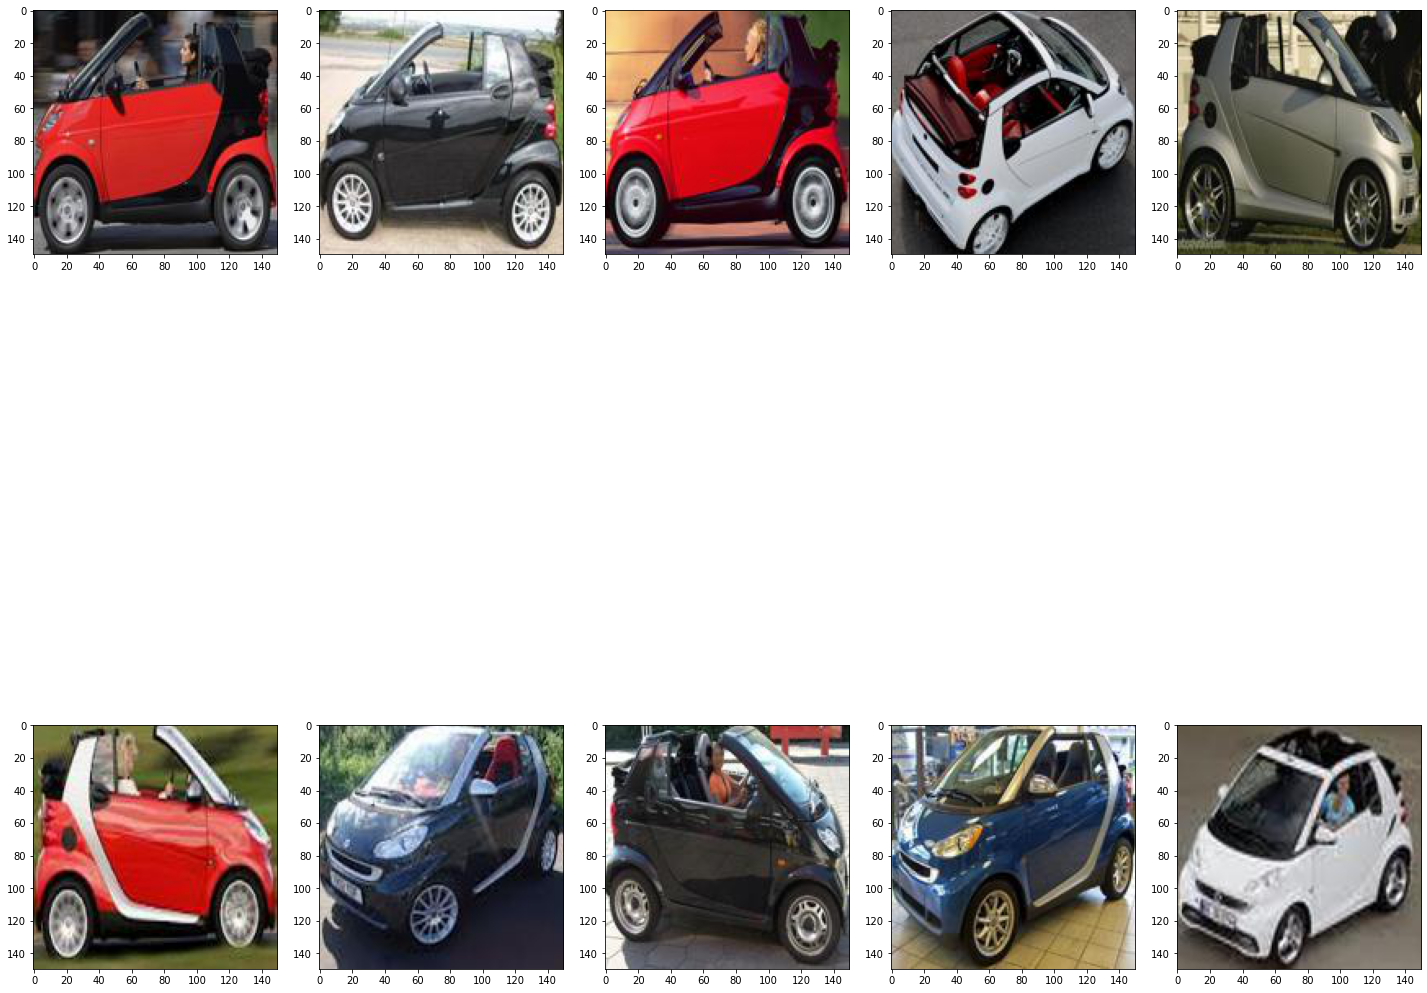

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import image as im
import numpy as np
fig,axes = plt.subplots(2,5,figsize = (20,20))
ax = axes.flatten()
plt.tight_layout()
for i,j in zip(os.listdir(),range(0,10)):
  ax[j].imshow(im.imread(os.path.join(os.getcwd(),i)))

### **Selecting validation data for neural Network from training set**

In [ ]:
os.chdir(r"/content/drive/MyDrive/kaggle/cars_train/classes/class_100/")
c = sorted(os.listdir())
len(c)

34

**Selecting 10 images from each Classes**

In [ ]:
import shutil
shutil.rmtree(r"/content/drive/MyDrive/kaggle/cars_train/validation")

NameError: ignored